We organized the data analysis process into five steps: Question, Wrangle, Explore, Draw Conclusions, and Communicate. Below is a review of the key points, but feel free to move ahead. We will practice each step as we go through the next sections, and you will get the whole process down in no time.

- ### Step 1: Ask questions
Either you're given data and ask questions based on it, or you ask questions first and gather data based on that later. In both cases, great questions help you focus on relevant parts of your data and direct your analysis towards meaningful insights.

- ### Step 2: Wrangle data
You get the data you need in a form you can work with in three steps: gather, assess, clean. You gather the data you need to answer your questions, assess your data to identify any problems in your data’s quality or structure, and clean your data by modifying, replacing, or removing data to ensure that your dataset is of the highest quality and as well-structured as possible.

- ### Step 3: Perform EDA (Exploratory Data Analysis)
You explore and then augment your data to maximize the potential of your analyses, visualizations, and models. Exploring involves finding patterns in your data, visualizing relationships in your data, and building intuition about what you’re working with. After exploring, you can do things like remove outliers and create better features from your data, also known as feature engineering.

- ### Step 4: Draw conclusions (or even make predictions)
This step is typically approached with machine learning or inferential statistics that are beyond the scope of this course, which will focus on drawing conclusions with descriptive statistics.

- ### Step 5: Communicate your results
You often need to justify and convey meaning in the insights you’ve found. Or, if your end goal is to build a system, you usually need to share what you’ve built, explain how you reached design decisions, and report how well it performs. There are many ways to communicate your results: reports, slide decks, blog posts, emails, presentations, or even conversations. Data visualization will always be very valuable.

Before walking through each of these steps with real datasets using Python, let's build a bit of intuition for each step!

### Let's ask questions about tumor data from the University of Wisconsin's general surgery lab.

- Let's use pandas to take a look at the data!
- What are good questions you can ask based on this information?

In [1]:
# import pandas
import pandas as pd

In [2]:
# load cancer data into data frame
df = pd.read_csv('cancer_data.csv')
# display first five rows of data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# print the column labels in the dataframe
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 diagnosis
2 radius_mean
3 texture_mean
4 perimeter_mean
5 area_mean
6 smoothness_mean
7 compactness_mean
8 concavity_mean
9 concave_points_mean
10 symmetry_mean
11 fractal_dimension_mean
12 radius_SE
13 texture_SE
14 perimeter_SE
15 area_SE
16 smoothness_SE
17 compactness_SE
18 concavity_SE
19 concave_points_SE
20 symmetry_SE
21 fractal_dimension_SE
22 radius_max
23 texture_max
24 perimeter_max
25 area_max
26 smoothness_max
27 compactness_max
28 concavity_max
29 concave_points_max
30 symmetry_max
31 fractal_dimension_max


### Questions
- How does the radius of the tumor vary in relationship with the diagnosis?
- How does the area of the tumor vary in relationship with the diagnosis?

### Things to think about
- How would you go about answering these questions?
- Which parts of this dataset might you use for each one?

### Assessing and Building Intuition
Once you have your data loaded into dataframes, Pandas makes a quick investigation of the data really easy. Let's explore some helpful methods for assessing and building intuition about a dataset.

In [4]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(569, 32)

In [5]:
# this returns the datatypes of the columns
df.dtypes

id                          int64
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
radius_SE                 float64
texture_SE                float64
perimeter_SE              float64
area_SE                   float64
smoothness_SE             float64
compactness_SE            float64
concavity_SE              float64
concave_points_SE         float64
symmetry_SE               float64
fractal_dimension_SE      float64
radius_max                float64
texture_max               float64
perimeter_max             float64
area_max                  float64
smoothness_max            float64
compactness_max           float64
concavity_max             float64
concave_points

In [6]:
# although the datatype for diagnosis appears to be object, further
# investigation shows it's a string
type(df['diagnosis'][0])

str

Pandas actually stores pointers to strings in dataframes and series, which is why object instead of str appears as the datatype. Understanding this is not essential for data analysis - just know that strings will appear as objects in Pandas.

In [7]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                        569 non-null int64
diagnosis                 569 non-null object
radius_mean               569 non-null float64
texture_mean              548 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           521 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave_points_mean       569 non-null float64
symmetry_mean             504 non-null float64
fractal_dimension_mean    569 non-null float64
radius_SE                 569 non-null float64
texture_SE                548 non-null float64
perimeter_SE              569 non-null float64
area_SE                   569 non-null float64
smoothness_SE             521 non-null float64
compactness_SE            569 non-null float64
concavity_SE              569 non-null float64
conca

In [8]:
# this returns the number of unique values in each column
df.nunique()

id                        562
diagnosis                   2
radius_mean               451
texture_mean              459
perimeter_mean            516
area_mean                 532
smoothness_mean           434
compactness_mean          530
concavity_mean            530
concave_points_mean       536
symmetry_mean             394
fractal_dimension_mean    494
radius_SE                 535
texture_SE                499
perimeter_SE              526
area_SE                   523
smoothness_SE             495
compactness_SE            534
concavity_SE              526
concave_points_SE         500
symmetry_SE               438
fractal_dimension_SE      539
radius_max                452
texture_max               490
perimeter_max             510
area_max                  537
smoothness_max            378
compactness_max           523
concavity_max             532
concave_points_max        485
symmetry_max              449
fractal_dimension_max     530
dtype: int64

In [9]:
# this returns useful descriptive statistics for each column of data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
count,5.690000e+02,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,...,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,569.000000
mean,3.051467e+07,14.113021,19.293431,91.877909,653.288576,0.096087,0.104536,0.088620,0.048837,0.181091,...,16.261896,25.660803,107.211142,880.163796,0.132090,0.254557,0.271681,0.114377,0.288856,0.084012
std,1.250417e+08,3.506148,4.327287,24.162787,349.476899,0.013924,0.052674,0.079011,0.038578,0.027899,...,4.841175,6.202916,33.621975,570.498628,0.022685,0.158042,0.208298,0.065760,0.062520,0.018151
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.691040e+05,11.700000,16.167500,75.170000,420.300000,0.086050,0.065260,0.029560,0.020360,0.161800,...,13.010000,21.017500,84.110000,515.300000,0.116600,0.146000,0.112500,0.064020,0.247650,0.071270
50%,9.060240e+05,13.370000,18.785000,86.340000,551.100000,0.095780,0.094530,0.061550,0.033700,0.178950,...,14.970000,25.370000,97.650000,686.500000,0.131200,0.211900,0.226700,0.100100,0.280650,0.080040
75%,8.910251e+06,15.780000,21.825000,103.800000,782.700000,0.104800,0.130500,0.131900,0.074040,0.195750,...,18.760000,29.675000,125.100000,1070.000000,0.145000,0.339900,0.385300,0.162500,0.317525,0.092110
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
# this returns the first few lines in our dataframe
# by default, it returns the first five
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# although, you can specify however many rows you'd like returned
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,NaN,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [12]:
# same thing applies to `.tail()` which returns the last few rows
df.tail(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039


### Indexing and Selecting Data in Pandas
Let's separate this dataframe into three new dataframes - one for each metric (mean, standard error, and maximum). To get the data for each dataframe, we need to select the id and diagnosis columns, as well as the ten columns for that metric.

In [13]:
# View the index number and label for each column
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 diagnosis
2 radius_mean
3 texture_mean
4 perimeter_mean
5 area_mean
6 smoothness_mean
7 compactness_mean
8 concavity_mean
9 concave_points_mean
10 symmetry_mean
11 fractal_dimension_mean
12 radius_SE
13 texture_SE
14 perimeter_SE
15 area_SE
16 smoothness_SE
17 compactness_SE
18 concavity_SE
19 concave_points_SE
20 symmetry_SE
21 fractal_dimension_SE
22 radius_max
23 texture_max
24 perimeter_max
25 area_max
26 smoothness_max
27 compactness_max
28 concavity_max
29 concave_points_max
30 symmetry_max
31 fractal_dimension_max


We can select data using loc and iloc, which you can read more about from the documentation. loc uses labels of rows or columns to select data, while iloc uses the index numbers. We'll use these to index the dataframe below.

In [14]:
# select all the columns from 'id' to the last mean column
df_means = df.loc[:,'id':'fractal_dimension_mean']
df_means.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [15]:
# repeat the step above using index numbers
df_means = df.iloc[:,:12]
df_means.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Let's save the dataframe of means for later.

In [16]:
df_means.to_csv('cancer_data_means.csv', index=False)

### Selecting Multiple Ranges in Pandas
Selecting the columns for the mean dataframe was pretty straightforward - the columns we needed to select were all together (id, diagnosis, and the mean columns). Now we run into a little issue when we try to do the same for the standard errors or maximum values. id and diagnosis are separated from the rest of the columns we need! We can't specify all of these in one range.

First, try creating the standard error dataframe on your own to see why doing this with just loc and iloc is an issue. Then, use this [stackoverflow link](https://stackoverflow.com/questions/41256648/select-multiple-ranges-of-columns-in-pandas-dataframe) to learn how to select multiple ranges in Pandas and try it below. By the way, to figure this out myself, I just found this link by googling "how to select multiple ranges df.iloc"

You may have to import a new package!

In [18]:
# import
import numpy as np


# create the standard errors dataframe
df_se = df.iloc[:, np.r_[:2, 12:21]]


# view the first few rows to confirm this was successful
df_se.head()

,id,diagnosis,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE
0,842302,M,1.0950,NaN,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003
1,842517,M,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389
2,84300903,M,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250
3,84348301,M,0.4956,1.1560,3.445,27.23,NaN,0.07458,0.05661,0.01867,0.05963
4,84358402,M,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756


### Cleaning Data
Let's first practice handling missing values and duplicate data using the cancer_data_means.csv file, which we created in a previous section.

In [19]:
df = pd.read_csv('cancer_data_means.csv')

# check which columns have missing values with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
id                        569 non-null int64
diagnosis                 569 non-null object
radius_mean               569 non-null float64
texture_mean              548 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           521 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave_points_mean       569 non-null float64
symmetry_mean             504 non-null float64
fractal_dimension_mean    569 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.4+ KB


In [20]:
# use means to fill in missing values
mean_texture = df['texture_mean'].mean()
df['texture_mean'].fillna(mean_texture, inplace=True)

mean_smoothness = df['smoothness_mean'].mean()
df['smoothness_mean'].fillna(mean_smoothness, inplace=True)

mean_symmetry = df['symmetry_mean'].mean()
df['symmetry_mean'].fillna(mean_symmetry, inplace=True)

# confirm your correction with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
id                        569 non-null int64
diagnosis                 569 non-null object
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave_points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.4+ KB


In [21]:
# check for duplicates in the data
sum(df.duplicated())

5

In [22]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [23]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

### Renaming Columns
Since we also previously changed our dataset to only include means of tumor features, the "_mean" at the end of each feature seems unnecessary. It just takes extra time to type in our analysis later. Let's come up with a list of new labels to assign to our columns.

In [24]:
# remove "_mean" from column names
new_labels = []
for col in df.columns:
    if '_mean' in col:
        new_labels.append(col[:-5])  # exclude last 6 characters
    else:
        new_labels.append(col)

# new labels for our columns
new_labels

['id',
 'diagnosis',
 'radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave_points',
 'symmetry',
 'fractal_dimension']

In [25]:
# assign new labels to columns in dataframe
df.columns = new_labels

# display first few rows of dataframe to confirm changes
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


In [26]:
# save this for later
df.to_csv('cancer_data_edited.csv', index=False)

### Descriptive Statistics and Visualizations
Let's use descriptive statistics and visualizations to address the questions we posed with this cancer data. Does the size of the tumor affect its malignancy? For this, we'd ideally compare the sizes of benign tumors with those of malignant tumors. We can use masks to select all the rows in the dataframe that were diagnosed as malignant and then all the rows as benign and put them in seperate data frames.

In [27]:
df_m = df[df['diagnosis'] == 'M']
df_m.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


In [28]:
df_m.area.describe()

count     210.000000
mean      976.582857
std       365.494289
min       361.600000
25%       706.850000
50%       932.000000
75%      1200.750000
max      2501.000000
Name: area, dtype: float64

In [29]:
df_b = df[df['diagnosis'] == 'B']
df_b.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863
40,89511502,B,12.670,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,0.05984


In [30]:
df_b.area.describe()

count    354.000000
mean     462.712429
std      134.769158
min      143.500000
25%      374.975000
50%      458.150000
75%      551.550000
max      992.100000
Name: area, dtype: float64

In [31]:
print('The mean area of malignant tumors is {} while that of benign tumors is {}'.format(df_m.area.mean(), df_b.area.mean()))

The mean area of malignant tumors is 976.5828571428573 while that of benign tumors is 462.7124293785311


Although summary statistics like the mean are helpful, it would be nice to be able to compare the distributions of the areas of malignant and benign tumors visually. Let's see a simple example of using Matplotlib to create histograms for both distributions on the same plot.

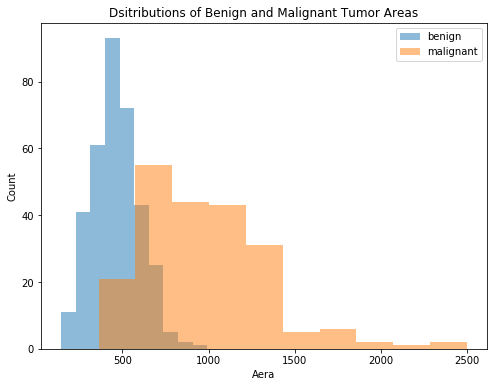

In [32]:
import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_b['area'], alpha=0.5, label='benign')
ax.hist(df_m['area'], alpha=0.5, label='malignant')
ax.set_title('Dsitributions of Benign and Malignant Tumor Areas')
ax.set_xlabel('Aera')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

### Conclusions
This visual suggests that there is a difference between the distribution of areas for benign and malignant tumors. We don't yet have the tools to conclude that these two distributions are different or weather the size definitely affects the tumor's malignancy. However, we can observe from summary statistics and these histograms that malignant tumors are generally larger in size than benign tumors.